#### Problem Statement: Clustering
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. In this problem statement we are given the task to identify the segments based on credit card usage.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-data/bank_marketing_part1_Data-1.csv


In [2]:
# Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('bright')
from warnings import filterwarnings
filterwarnings('ignore')

Data Dictionary for Market Segmentation
1.	spending: Amount spent by the customer per month (in 1000s)
2.	advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.	probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.	current_balance: Balance amount left in the account to make purchases (in 1000s)
5.	credit_limit: Limit of the amount in credit card (10000s)
6.	min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.	max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


#### 1.1 Exploratory Data Analysis

In [3]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/bank-marketing-data/bank_marketing_part1_Data-1.csv')

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.shape

(210, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


From the above table below are the observations.

1.	Spending which is the target variable looks like it’s normally distributed as we can see that mean and median are same.
2.	advance_payments also seems to be normally distributed. This variable might be of use as it shows that customers are paying the amount in advance which is timely payment for the bank.
3.	The average probability_of_full_payment is 87.10%. Hence we need to analyse further to see the rest of the customers who fall under 13% who have not done the payment in full. This variable is normally distributed.
4.	Minimum current_balance held by customer is 4899.00.
5.	credit_limit of customers range between 26300.00 to 40330.00. The average credit_limit of customers is 32586.05.
6.	The minimum of min_payment_amt paid is 76.51. The maximum of min_payment_amt paid is 845.60. This suggests the data is widely spread for this variable and might have outliers. Also looks like normally distributed.
7.	The average of max_spent_in_single_shopping is 5408.07. The maximum of max_spent_in_single_shopping is 6550.00.


### Univariate Analysis

In [10]:
df1 = df

#### Boxplots

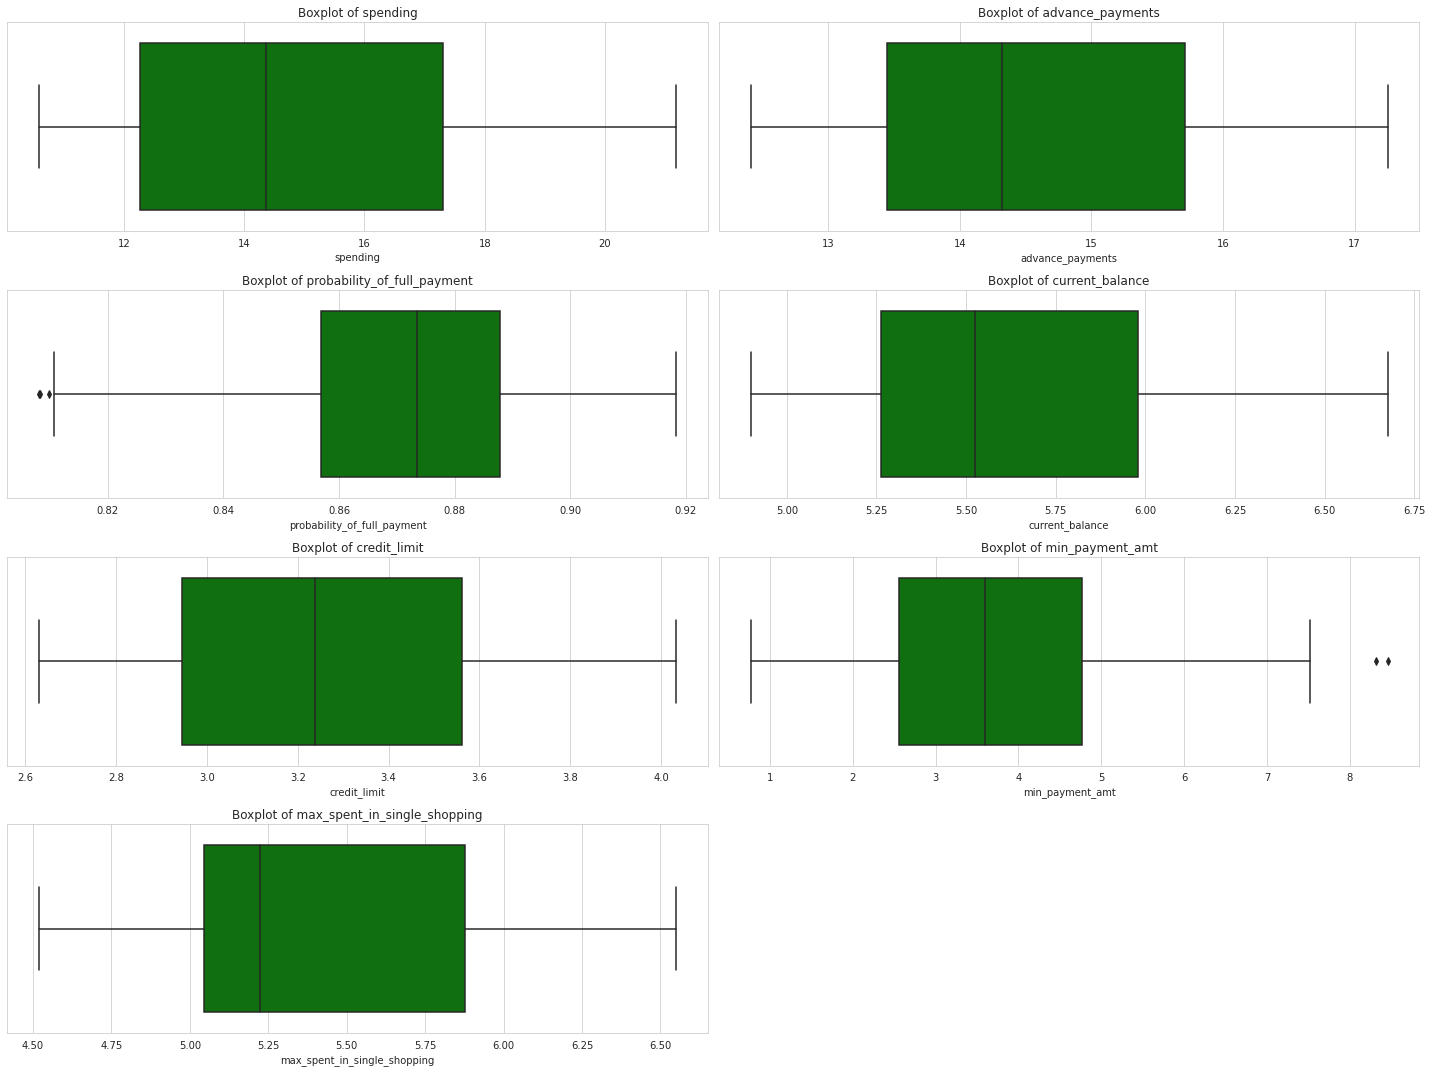

In [11]:
plt.figure(figsize = (20,15))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df1[feature_list[i]], data=df1, orient='h', color='g')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [12]:
from scipy.stats import norm

#### Distribution Plots

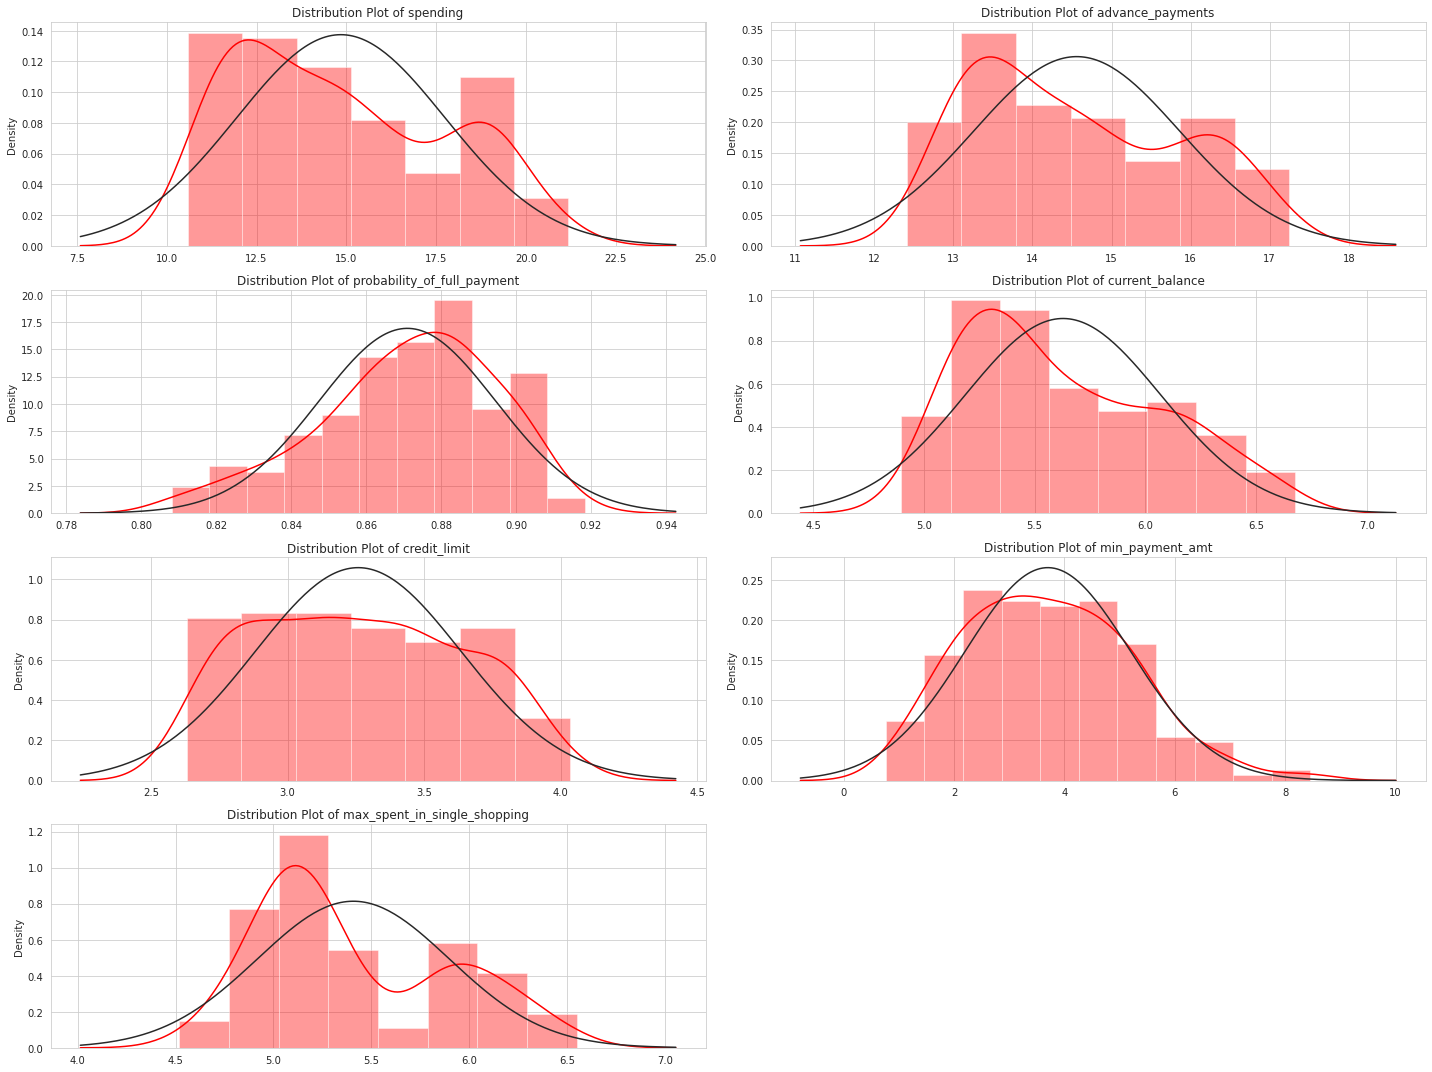

In [13]:
plt.figure(figsize = (20,15))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.distplot(x=df1[feature_list[i]], color='r', fit=norm)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Skewness and Kurtosis

In [14]:
for columns in df1.columns:
    print('Skewness of {} is'.format(columns), round(df1[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df1[columns].kurt(),2))

Skewness of spending is 0.4
Kurtosis of spending is -1.08
Skewness of advance_payments is 0.39
Kurtosis of advance_payments is -1.11
Skewness of probability_of_full_payment is -0.54
Kurtosis of probability_of_full_payment is -0.14
Skewness of current_balance is 0.53
Kurtosis of current_balance is -0.79
Skewness of credit_limit is 0.13
Kurtosis of credit_limit is -1.1
Skewness of min_payment_amt is 0.4
Kurtosis of min_payment_amt is -0.07
Skewness of max_spent_in_single_shopping is 0.56
Kurtosis of max_spent_in_single_shopping is -0.84


### Bivariate Analysis

#### Pairplots

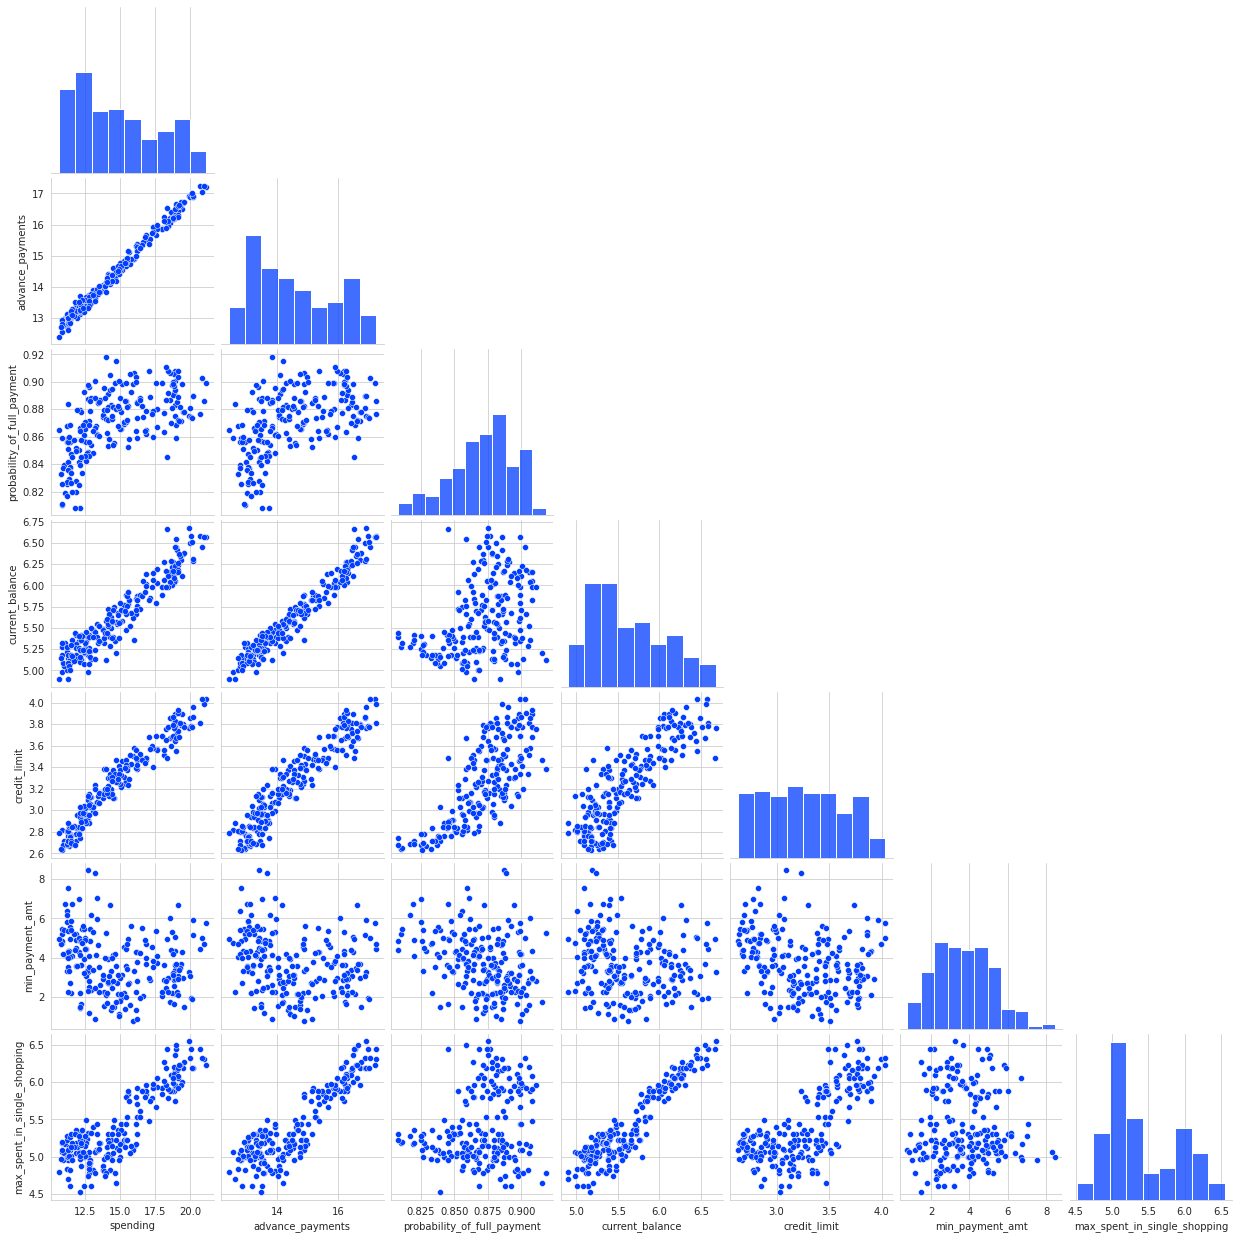

In [15]:
sns.pairplot(df1, corner=True);

#### Lmplots

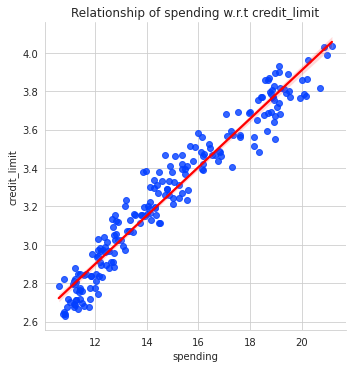

In [16]:
sns.lmplot(x='spending', y='credit_limit', data=df1, palette="Set1", line_kws={'color': 'red'});
plt.title('Relationship of spending w.r.t credit_limit');

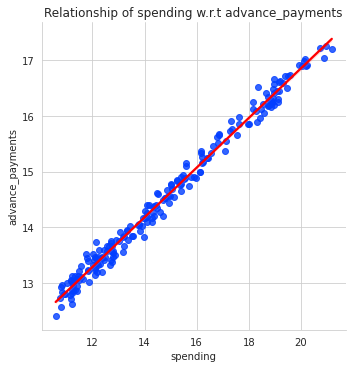

In [17]:
sns.lmplot(x='spending', y='advance_payments', data=df1, palette="Set1", line_kws={'color': 'red'});
plt.title('Relationship of spending w.r.t advance_payments');

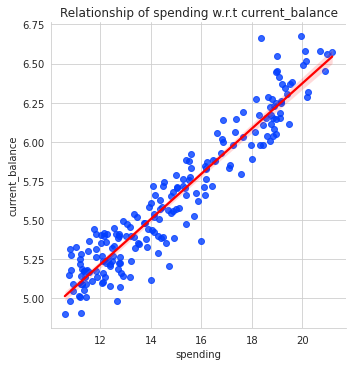

In [18]:
sns.lmplot(x='spending', y='current_balance', data=df1, palette="Set1", line_kws={'color': 'red'});
plt.title('Relationship of spending w.r.t current_balance');

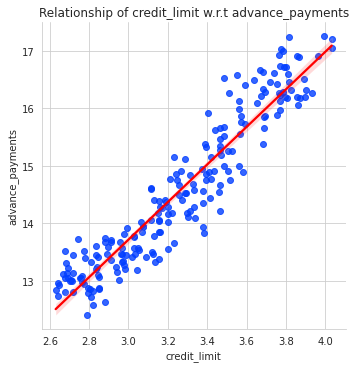

In [19]:
sns.lmplot(x='credit_limit', y='advance_payments', data=df1, palette="Set1", line_kws={'color': 'red'});
plt.title('Relationship of credit_limit w.r.t advance_payments');

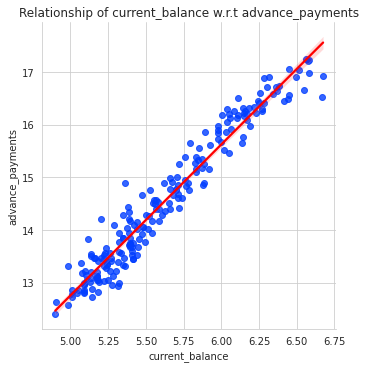

In [20]:
sns.lmplot(x='current_balance', y='advance_payments', data=df1, palette="Set1", line_kws={'color': 'red'});
plt.title('Relationship of current_balance w.r.t advance_payments');

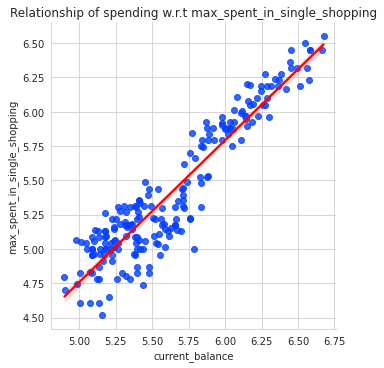

In [21]:
sns.lmplot(x='current_balance', y='max_spent_in_single_shopping', data=df1, palette="Set1", line_kws={'color': 'red'});
plt.title('Relationship of spending w.r.t max_spent_in_single_shopping');

#### Correlation Heatmaps

In [22]:
corr = df1.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


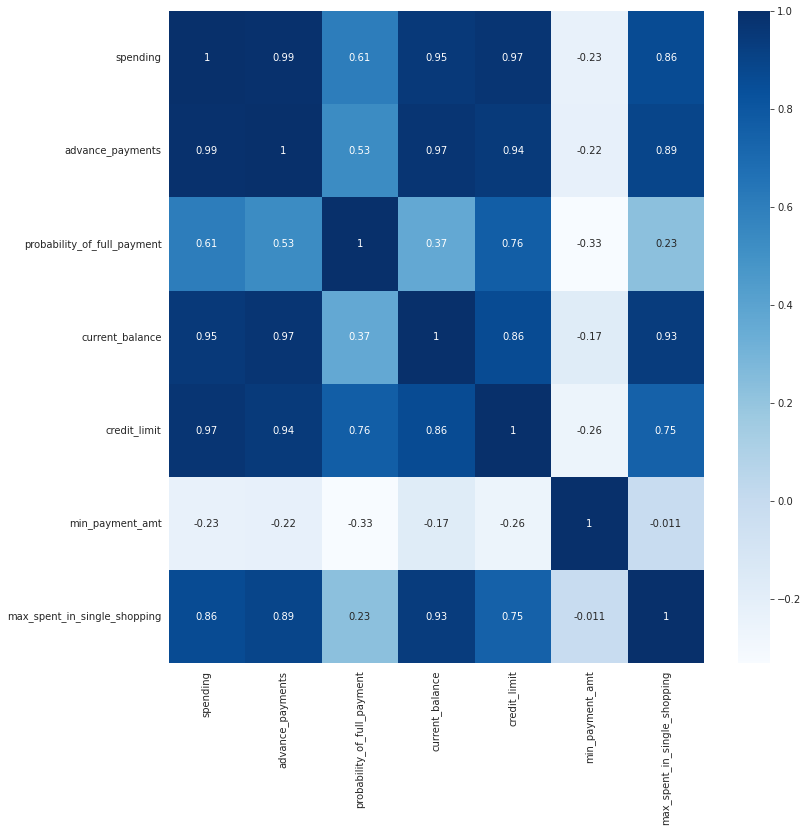

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues');
plt.show();

From the above pairplot and correlation heatmaps, we can see that there is positive linear relationship between advance_payments and spending, current_balance and spending, credit_limit and spending, current_balance and advance_payments, credit_limit and advance_payments, max_spent_in_single_shopping and current_balance. This suggests that there is Multicollinearity between the variables.  

#### 1.2 Let us see if scaling is necessary for clustering in this case.

Scaling or Standardization is an important step in data pre-processing. Most of the machine learning models use scaled data unless the data in hand is naturally scaled. 

Let us see the variances between variables in the provided dataset.

In [24]:
# Let us see the variance of each variable
df1.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

From the above table though there is not much variance between most of the variables, our target variable spending has a variance of 8.46 whereas other variables variance lie between 0 and 2. Hence scaling is necessary. 

We will be using the Standard Scaler method for scaling our data. This method will calculate the z-score for each data point and then scale the data such that mean = 0 and variance/standard deviation = 1. 

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
scaled_df = sc.fit_transform(df1)

In [27]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [28]:
scaled_df.shape

(210, 7)

In [29]:
# Transforming scaled data array back to pandas dataframe
scaled_df = pd.DataFrame(scaled_df, index=df1.index, columns=df1.columns)

In [30]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram. It can be obtained via Fclusters or Agglomerative Clustering.

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

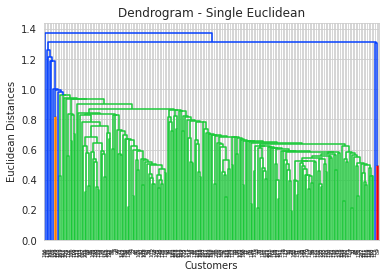

In [32]:
link1 = linkage(scaled_df, method='single', metric='euclidean')
dend1 = dendrogram(link1)
plt.title('Dendrogram - Single Euclidean')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show();

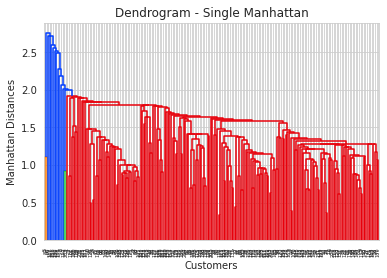

In [33]:
link2 = linkage(scaled_df, method='single', metric='cityblock')
dend2 = dendrogram(link2)
plt.title('Dendrogram - Single Manhattan')
plt.xlabel('Customers')
plt.ylabel('Manhattan Distances')
plt.show();

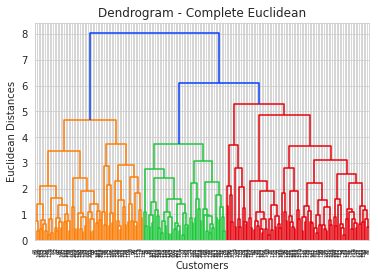

In [34]:
link3 = linkage(scaled_df, method='complete', metric='euclidean')
dend3 = dendrogram(link3)
plt.title('Dendrogram - Complete Euclidean')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show();

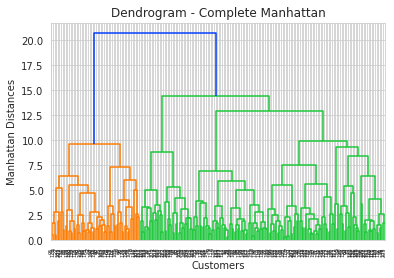

In [35]:
link4 = linkage(scaled_df, method='complete', metric='cityblock')
dend4 = dendrogram(link4)
plt.title('Dendrogram - Complete Manhattan')
plt.xlabel('Customers')
plt.ylabel('Manhattan Distances')
plt.show();

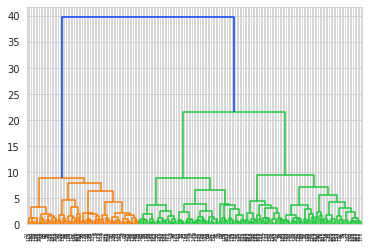

In [36]:
wardlink = linkage(scaled_df, method='ward')
dend = dendrogram(wardlink)

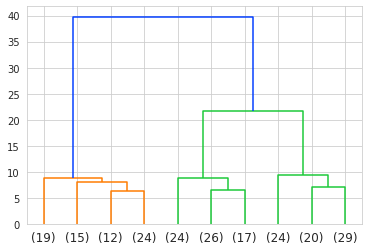

In [37]:
dend = dendrogram(wardlink, truncate_mode='lastp', p=10)

In [38]:
from scipy.cluster.hierarchy import fcluster

In [39]:
clusters = fcluster(wardlink, t=3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [40]:
# Adding the cluster profiles to the original dataset
df1['clusters'] = clusters

In [41]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [42]:
# Cluster frequency
df1.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

#### Cluster Profiles

In [43]:
aggdata = df1.iloc[:,0:8].groupby('clusters').mean()
aggdata['frequency'] = df1.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


#### Hierarchical Clusters Scatterplot

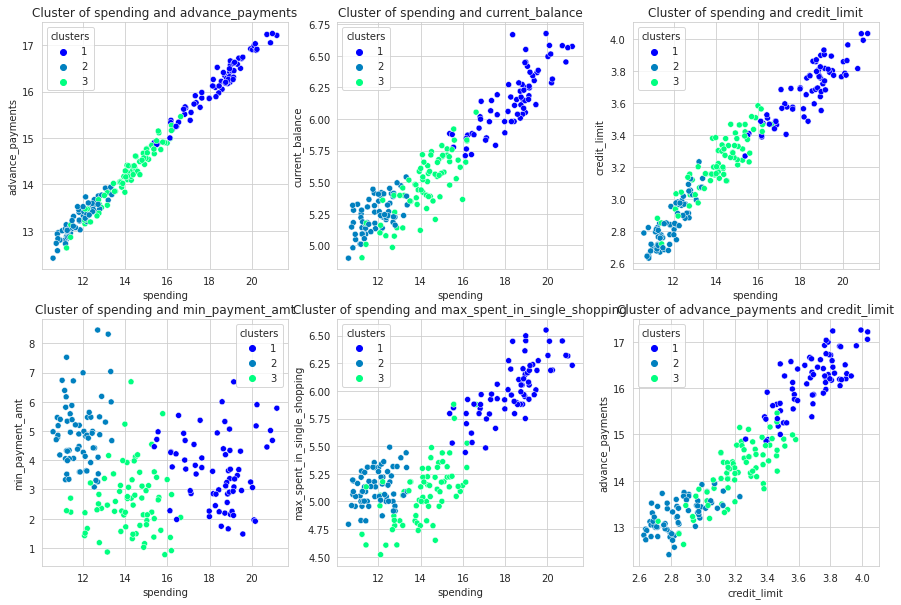

In [44]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='clusters', data=df1, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='clusters', data=df1, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)
sns.scatterplot(y='credit_limit', x='spending', hue='clusters', data=df1, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='clusters', data=df1, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='clusters', data=df1, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='clusters', data=df1, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit');

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Interpret the inferences from the model. K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Silhouette Score must be calculated for the same values of K taken above. Customer Segmentation can be visualized using appropriate graphs.

In [45]:
from sklearn.cluster import KMeans

In [46]:
# forming 3 clusters with K = 3
k_means = KMeans(n_clusters=3)

In [47]:
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [48]:
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0], dtype=int32)

In [49]:
k_means.inertia_

430.65897315130064

In [50]:
# Forming clusters with K = 1,3,4,5,6 and comparing the WSS
k_means1 = KMeans(n_clusters = 1)
k_means1.fit(scaled_df)
k_means1.inertia_

1469.9999999999995

In [51]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(scaled_df)
k_means2.inertia_

659.1717544870411

In [52]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
k_means3.inertia_

430.65897315130064

In [53]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_df)
k_means4.inertia_

371.6531439995162

In [54]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(scaled_df)
k_means5.inertia_

327.5552194062662

In [55]:
k_means6 = KMeans(n_clusters = 6)
k_means6.fit(scaled_df)
k_means6.inertia_

289.35342339949597

#### WSS scores keep reducing as we increase the number of clusters

#### Calculating WSS for other values of K - Elbow Method

In [56]:
wss = []

In [57]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [58]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.28344766743334,
 327.5685727199818,
 289.22019649887096,
 262.72101957044134,
 243.73139561508535,
 222.70010361644694,
 208.23753336811845]

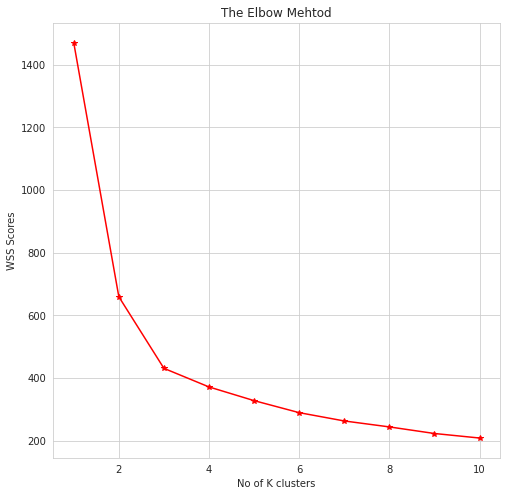

In [59]:
plt.figure(figsize=(8,8))
plt.plot(range(1,11), wss, marker='*', color='r');
plt.title('The Elbow Mehtod')
plt.xlabel('No of K clusters')
plt.ylabel('WSS Scores')
plt.show();

#### Cluster evaluation for 3 clusters: The Silhouette score

In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [61]:
labels = k_means3.labels_
silhouette_score(scaled_df,labels)

0.40072705527512986

In [62]:
sil_width = []

In [63]:
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    labels = KM.labels_
    sil = silhouette_score(scaled_df,labels)
    print('i ', i, sil)
    sil_width.append(sil)

i  2 0.46577247686580914
i  3 0.40072705527512986
i  4 0.3347912611982698
i  5 0.2855773315496825
i  6 0.2803523466823019
i  7 0.2832584050827195
i  8 0.25928958155402665
i  9 0.2563320755646944
i  10 0.2620931402750858


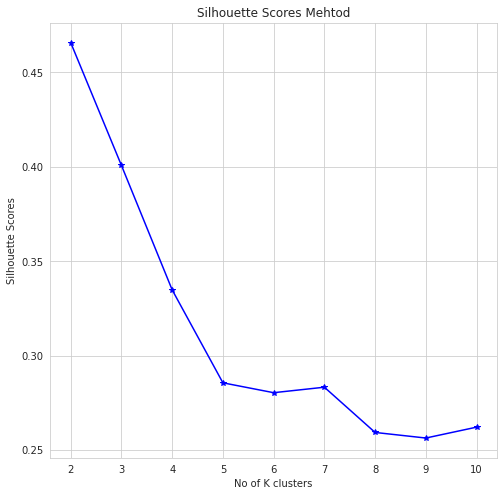

In [64]:
plt.figure(figsize=(8,8))
plt.plot(range(2,11), sil_width, marker='*', color='b')
plt.title('Silhouette Scores Mehtod')
plt.xlabel('No of K clusters')
plt.ylabel('Silhouette Scores')
plt.show();

Silhouette score is the best for 3 clusters hence we will go with 3 cluster profiling for this dataset

In [65]:
scaled_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [66]:
df_kmeans = scaled_df

In [67]:
# Adding the cluster profiles to the original dataset
df_kmeans['k_clusters'] = k_means3.labels_
df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,2
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,2
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,1
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,2


In [68]:
# Cluster frequency
df_kmeans['k_clusters'].value_counts().sort_index()

0    71
1    72
2    67
Name: k_clusters, dtype: int64

#### Cluster profiles

In [69]:
aggdata_kmeans = df_kmeans.iloc[:,0:8].groupby('k_clusters').mean()
aggdata_kmeans['frequency'] = df_kmeans.k_clusters.value_counts().sort_index()
aggdata_kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
k_clusters,,,,,,,,
0,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893,71
1,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809,72
2,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,67


#### K-means Clusters Scatterplot

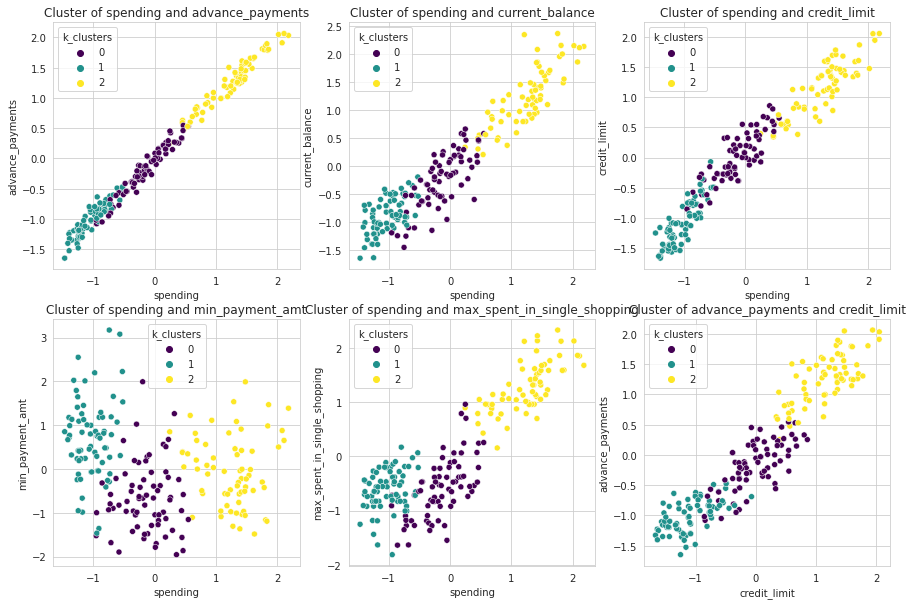

In [70]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='k_clusters', data=df_kmeans, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='k_clusters', data=df_kmeans, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)
sns.scatterplot(y='credit_limit', x='spending', hue='k_clusters', data=df_kmeans, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='k_clusters', data=df_kmeans, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='k_clusters', data=df_kmeans, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='k_clusters', data=df_kmeans, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit');

### Business insights based on Cluster profiles: 

When we look at the final clusters merged with original dataset and take the average values for the variables, below are the recommendations for each cluster profile. 

Cluster 1: Platinum customers
Cluster 3: Gold customers
Cluster 2: Silver customers

Customers under cluster 1 have a high spending, current balance, credit_limit and max_spent_in_single_shopping which clearly shows that they are premium high-net worth customers who make expensive purchases on their credit cards.

Customers under cluster 3 have a relatively lesser spending, current balance, credit_limit and max_spent_in_single_shopping which indicate that they are upper middle class customers. The bank can provide promotional offers to this segment such that they increase their spending and are potential customers who can move into premium segments.

Customers under cluster 2 have the least spending and credit_limits compared to other clusters. This signifies that they are customers who have recently bought credit cards or youths who have started working recently. Bank can provide customized offers to this segment to promote more spending on credit cards.


----HAPPY LEARNING-----